In [1]:
# import
import pandas as pd
import numpy as np
from matplotlib.pyplot import bar
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier



In [2]:
df = pd.read_csv(r'../Datasets/Airlines.csv')
df.head(2)

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1


In [3]:
df[df["Length"]==0]

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
179149,179150,F9,106,DEN,MSP,6,635,0,0
182840,182841,F9,107,MSP,DEN,6,851,0,0
188953,188954,F9,103,MSP,DEN,7,375,0,0
445578,445579,B6,493,BOS,SEA,7,1060,0,1


In [4]:
df["Airline"].unique()

array(['CO', 'US', 'AA', 'AS', 'DL', 'B6', 'HA', 'OO', '9E', 'OH', 'EV',
       'XE', 'YV', 'UA', 'MQ', 'FL', 'F9', 'WN'], dtype=object)

In [5]:
airlines = df["Airline"].unique()
mapping = dict(zip(airlines,range(len(airlines))))
df["Airline"] = df["Airline"].map(mapping)
df

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,0,269,SFO,IAH,3,15,205,1
1,2,1,1558,PHX,CLT,3,15,222,1
2,3,2,2400,LAX,DFW,3,20,165,1
3,4,2,2466,SFO,DFW,3,20,195,1
4,5,3,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...,...
539378,539379,0,178,OGG,SNA,5,1439,326,0
539379,539380,15,398,SEA,ATL,5,1439,305,0
539380,539381,15,609,SFO,MKE,5,1439,255,0
539381,539382,13,78,HNL,SFO,5,1439,313,1


In [6]:
df["AirportFrom"].unique()


array(['SFO', 'PHX', 'LAX', 'ANC', 'LAS', 'SLC', 'DEN', 'ONT', 'FAI',
       'BQN', 'PSE', 'HNL', 'BIS', 'IYK', 'EWR', 'BOS', 'MKE', 'GFK',
       'OMA', 'GSO', 'LMT', 'SEA', 'MCO', 'TPA', 'DLH', 'MSP', 'FAR',
       'MFE', 'MSY', 'VPS', 'BWI', 'MAF', 'LWS', 'RST', 'ALB', 'DSM',
       'CHS', 'MSN', 'JAX', 'SAT', 'PNS', 'BHM', 'LIT', 'SAV', 'BNA',
       'ICT', 'ECP', 'DHN', 'MGM', 'CAE', 'PWM', 'ACV', 'EKO', 'PHL',
       'ATL', 'PDX', 'RIC', 'BTR', 'HRL', 'MYR', 'TUS', 'SBN', 'CAK',
       'TVC', 'CLE', 'ORD', 'DAY', 'MFR', 'BTV', 'TLH', 'TYS', 'DFW',
       'FLL', 'AUS', 'CHA', 'CMH', 'LRD', 'BRO', 'CRP', 'LAN', 'PVD',
       'FWA', 'JFK', 'LGA', 'OKC', 'PIT', 'PBI', 'ORF', 'DCA', 'AEX',
       'SYR', 'SHV', 'VLD', 'BDL', 'FAT', 'BZN', 'RDM', 'LFT', 'IPL',
       'EAU', 'ERI', 'BUF', 'IAH', 'MCI', 'AGS', 'ABI', 'GRR', 'LBB',
       'CLT', 'LEX', 'MBS', 'MOD', 'AMA', 'SGF', 'AZO', 'ABE', 'SWF',
       'BGM', 'AVP', 'FNT', 'GSP', 'ATW', 'ITH', 'TUL', 'COS', 'ELP',
       'ABQ', 'SMF',

In [7]:
portFrom = df["AirportFrom"].unique()
mapping = dict(zip(portFrom,range(len(portFrom))))
df["AirportFrom"] = df["AirportFrom"].map(mapping)
df

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,0,269,0,IAH,3,15,205,1
1,2,1,1558,1,CLT,3,15,222,1
2,3,2,2400,2,DFW,3,20,165,1
3,4,2,2466,0,DFW,3,20,195,1
4,5,3,108,3,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...,...
539378,539379,0,178,193,SNA,5,1439,326,0
539379,539380,15,398,21,ATL,5,1439,305,0
539380,539381,15,609,0,MKE,5,1439,255,0
539381,539382,13,78,11,SFO,5,1439,313,1


In [8]:
df["AirportTo"].unique()


array(['IAH', 'CLT', 'DFW', 'SEA', 'MSP', 'DTW', 'ORD', 'ATL', 'PDX',
       'JFK', 'SLC', 'HNL', 'PHX', 'MCO', 'OGG', 'LAX', 'KOA', 'ITO',
       'SFO', 'MIA', 'IAD', 'SMF', 'PHL', 'LIH', 'DEN', 'LGA', 'MEM',
       'CVG', 'YUM', 'CWA', 'MKE', 'BQN', 'FAI', 'LAS', 'ANC', 'BOS',
       'LGB', 'FLL', 'SJU', 'EWR', 'DCA', 'BWI', 'RDU', 'MCI', 'TYS',
       'SAN', 'ONT', 'OAK', 'MDW', 'BNA', 'DAL', 'CLE', 'JAX', 'JNU',
       'RNO', 'ELP', 'SAT', 'OTZ', 'MBS', 'BDL', 'STL', 'HOU', 'AUS',
       'SNA', 'SJC', 'LIT', 'TUS', 'TUL', 'CMH', 'LAN', 'IND', 'AMA',
       'CRP', 'PIT', 'RKS', 'FWA', 'TPA', 'PBI', 'JAN', 'DSM', 'ADQ',
       'GRB', 'PVD', 'ABQ', 'SDF', 'RSW', 'MSY', 'BUR', 'BOI', 'TLH',
       'BHM', 'ACV', 'ORF', 'BET', 'KTN', 'RIC', 'SRQ', 'BTR', 'XNA',
       'MHT', 'GRR', 'SBN', 'SBA', 'ROA', 'CID', 'GPT', 'MFR', 'SGU',
       'HPN', 'OMA', 'OTH', 'GSP', 'LMT', 'BUF', 'MSN', 'BFL', 'CAE',
       'HRL', 'OKC', 'SYR', 'COS', 'BTV', 'CDC', 'SCC', 'DAY', 'SJT',
       'TVC', 'ROC',

In [9]:
portTo = df["AirportTo"].unique()
mapping = dict(zip(portTo,range(len(portTo))))
df["AirportTo"] = df["AirportTo"].map(mapping)
data = df[df["Length"]!=0]
data

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,0,269,0,0,3,15,205,1
1,2,1,1558,1,1,3,15,222,1
2,3,2,2400,2,2,3,20,165,1
3,4,2,2466,0,2,3,20,195,1
4,5,3,108,3,3,3,30,202,0
...,...,...,...,...,...,...,...,...,...
539378,539379,0,178,193,63,5,1439,326,0
539379,539380,15,398,21,7,5,1439,305,0
539380,539381,15,609,0,30,5,1439,255,0
539381,539382,13,78,11,18,5,1439,313,1


id             0.139757
Airline        0.104621
Flight        -0.046179
AirportFrom   -0.010499
AirportTo      0.021925
DayOfWeek     -0.026197
Time           0.150450
Length         0.040485
Delay          1.000000
Name: Delay, dtype: float64

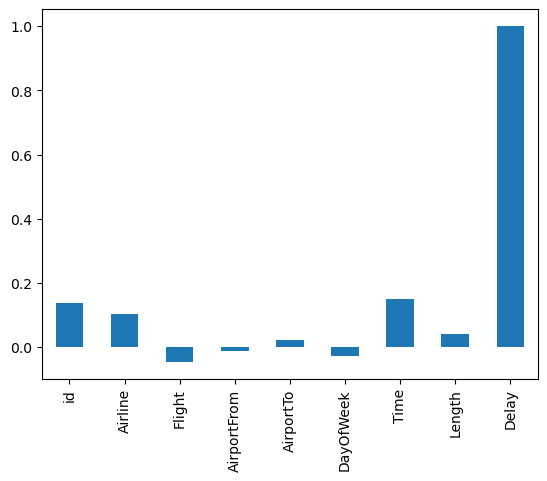

In [10]:
data.corr()["Delay"].plot.bar()
data.corr()["Delay"]

In [11]:
x = data.drop("Delay",axis=1)
y = np.array(data["Delay"])

<BarContainer object of 2 artists>

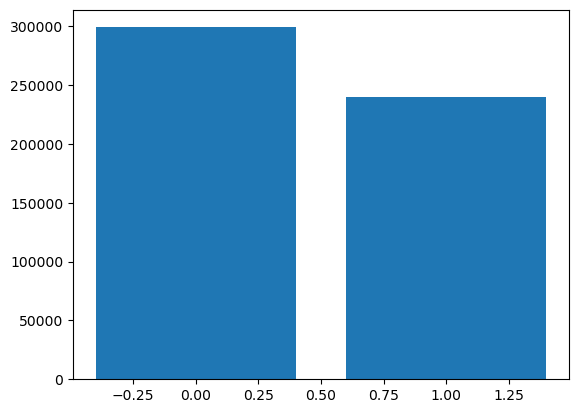

In [12]:

lst = np.array(y)
counts = [0,0]
for i in lst:
    counts[i]+=1
bar(range(2),counts)

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2)